## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!C:\"Program Files"\"NVIDIA Corporation"\NVSMI\nvidia-smi.exe

Fri Jul 12 13:03:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 422.02       Driver Version: 422.02       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=False):
    x = ((x / 255.)-0.5)*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train, True)
x_test = preproc_x(x_test, True)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, out_units=10, num_neurons=[512, 512, 256, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, name="FC"+str(i), activation='relu')(input_layer)
            x = keras.layers.Dropout(0.2)(x)
        else:
            x = keras.layers.Dense(units=n_units, name="FC"+str(i), activation='relu')(x)
            x = keras.layers.Dropout(0.2)(x)
    output_layer = keras.layers.Dense(units=10, activation='softmax')(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

input_shape = [x_train.shape[-1]]
model = build_mlp(input_shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
FC0 (Dense)                  (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
import time
time_start = time.time()
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
time_end = time.time()

print("train time : %d sec"%(time_end-time_start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.9538 - acc: 0.2845 - val_loss: 1.6950 - val_acc: 0.3878
Epoch 2/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.7238 - acc: 0.3849 - val_loss: 1.5861 - val_acc: 0.4454
Epoch 3/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.6206 - acc: 0.4272 - val_loss: 1.5211 - val_acc: 0.4564
Epoch 4/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.5542 - acc: 0.4540 - val_loss: 1.4643 - val_acc: 0.4845
Epoch 5/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.4998 - acc: 0.4731 - val_loss: 1.4325 - val_acc: 0.4901
Epoch 6/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.4549 - acc: 0.4932 - val_loss: 1.4090 - val_acc: 0.5014
Epoch 7/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.4133 - acc: 0.5096 - val_loss: 1.4065 -

50000/50000 [==============================] - 3s 67us/step - loss: 0.6560 - acc: 0.7805 - val_loss: 1.4600 - val_acc: 0.5673
Epoch 60/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.6447 - acc: 0.7845 - val_loss: 1.4567 - val_acc: 0.5710
Epoch 61/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.6438 - acc: 0.7855 - val_loss: 1.4729 - val_acc: 0.5679
Epoch 62/100
50000/50000 [==============================] - 3s 68us/step - loss: 0.6298 - acc: 0.7891 - val_loss: 1.4965 - val_acc: 0.5651
Epoch 63/100
50000/50000 [==============================] - 3s 68us/step - loss: 0.6302 - acc: 0.7897 - val_loss: 1.4792 - val_acc: 0.5591
Epoch 64/100
50000/50000 [==============================] - 3s 65us/step - loss: 0.6190 - acc: 0.7934 - val_loss: 1.4981 - val_acc: 0.5674cc: 0.79
Epoch 65/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.6215 - acc: 0.7928 - val_loss: 1.4834 - val_acc: 0.5620
Epoch 66/100
50000/50000 [======

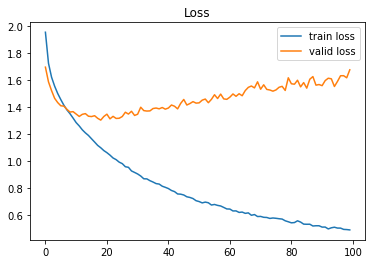

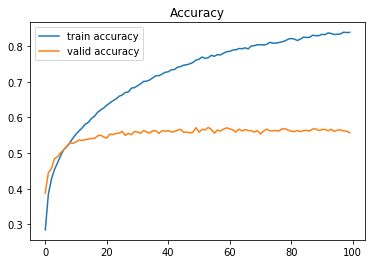

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Training by GPU